In [5]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
from dateutil.parser import parse

In [21]:
CB = pd.read_csv('../metricas/Fines_Caso_Base.csv',names=['tiempo','Ti','To','Ti_CB'],skiprows=1)
CB.set_index('tiempo',inplace=True)
CB

,Ti,To,Ti_CB
tiempo,,,
2019-06-08 00:00:00,25.348056,NaN,NaN
2019-06-08 01:00:00,25.100011,20.0,26.101197
2019-06-08 02:00:00,24.771206,19.7,25.695976
2019-06-08 03:00:00,24.556618,19.6,25.409725
2019-06-08 04:00:00,24.153977,18.9,24.951275
...,...,...,...
2019-06-23 19:00:00,27.848124,27.0,29.132126
2019-06-23 20:00:00,27.375107,25.2,28.734320
2019-06-23 21:00:00,26.943624,23.8,28.265460


In [22]:
CI = pd.read_csv('../metricas/Fines_Caso_infiltracion.csv',names=['tiempo','Ti_CI'],skiprows=1)
CI.set_index('tiempo',inplace=True)
CI

,Ti_CI
tiempo,
2019-06-08 00:00:00,NaN
2019-06-08 01:00:00,25.077822
2019-06-08 02:00:00,24.464593
2019-06-08 03:00:00,24.452179
2019-06-08 04:00:00,23.787841
...,...
2019-06-23 19:00:00,28.590105
2019-06-23 20:00:00,28.110628
2019-06-23 21:00:00,26.665773


In [23]:
compara = pd.concat([CB,CI],axis=1)
compara

,Ti,To,Ti_CB,Ti_CI
tiempo,,,,
2019-06-08 00:00:00,25.348056,NaN,NaN,NaN
2019-06-08 01:00:00,25.100011,20.0,26.101197,25.077822
2019-06-08 02:00:00,24.771206,19.7,25.695976,24.464593
2019-06-08 03:00:00,24.556618,19.6,25.409725,24.452179
2019-06-08 04:00:00,24.153977,18.9,24.951275,23.787841
...,...,...,...,...
2019-06-23 19:00:00,27.848124,27.0,29.132126,28.590105
2019-06-23 20:00:00,27.375107,25.2,28.734320,28.110628
2019-06-23 21:00:00,26.943624,23.8,28.265460,26.665773


In [24]:
CC = pd.read_csv('../metricas/Fines_Caso_Combinado.csv',names=['tiempo','Ti_CC'],skiprows=1)
CC.set_index('tiempo',inplace=True)
CC

,Ti_CC
tiempo,
2019-06-08 00:00:00,NaN
2019-06-08 01:00:00,24.869803
2019-06-08 02:00:00,24.263195
2019-06-08 03:00:00,24.248926
2019-06-08 04:00:00,23.613492
...,...
2019-06-23 19:00:00,28.200178
2019-06-23 20:00:00,27.750983
2019-06-23 21:00:00,26.364116


In [25]:
datos = pd.concat([compara,CC],axis=1)
datos

,Ti,To,Ti_CB,Ti_CI,Ti_CC
tiempo,,,,,
2019-06-08 00:00:00,25.348056,NaN,NaN,NaN,NaN
2019-06-08 01:00:00,25.100011,20.0,26.101197,25.077822,24.869803
2019-06-08 02:00:00,24.771206,19.7,25.695976,24.464593,24.263195
2019-06-08 03:00:00,24.556618,19.6,25.409725,24.452179,24.248926
2019-06-08 04:00:00,24.153977,18.9,24.951275,23.787841,23.613492
...,...,...,...,...,...
2019-06-23 19:00:00,27.848124,27.0,29.132126,28.590105,28.200178
2019-06-23 20:00:00,27.375107,25.2,28.734320,28.110628,27.750983
2019-06-23 21:00:00,26.943624,23.8,28.265460,26.665773,26.364116


In [29]:
datos.to_csv('../data/todos.csv')

## Grafica de datos juntos

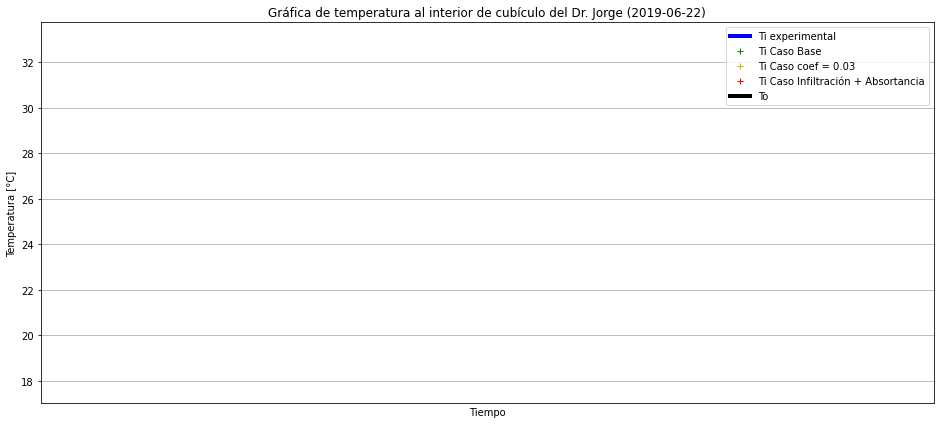

In [28]:
fig, ax = plt.subplots(figsize=(16,7))

fecha1 = parse("2019-06-22")
fecha2 = fecha1 + pd.Timedelta("2D")

ax.set_xlim(fecha1,fecha2)


ax.plot(datos.Ti,'b-',linewidth=4,label='Ti experimental')
ax.plot(datos.Ti_CB,'g+',label='Ti Caso Base')
ax.plot(datos.Ti_CI,'y+',label='Ti Caso coef = 0.03')
ax.plot(datos.Ti_CC,'r+',label='Ti Caso Infiltración + Absortancia')

ax.plot(datos.To,'k-',linewidth=4,label='To')

#Cositas pa' darle formato
ax.set(xlabel='Tiempo', ylabel='Temperatura [°C]',
       title='Gráfica de temperatura al interior de cubículo del Dr. Jorge (2019-06-22)')
ax.legend()
ax.grid()